![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

---
# Data-X: Introduction to Pandas 

**Author list (in no particular order):** [Priya Kamdar](www.linkedin.com/in/priya-kamdar), [Alexander Fred-Ojala](https://www.linkedin.com/in/alexanderfo/), [Ikhlaq Sidhu](https://ikhlaq-sidhu.com/), [Elias Castro Hernandez](https://www.linkedin.com/in/ehcastroh/), and [Debbie Yuen](http://www.debbiecyuen.me/) 

**Video Walkthrough:** To view walkthrough of this notebook, click [here](https://youtu.be/H7QYxdPJFy8)

**References and Additional Resources:** See end of this notebook for additional information related to Pandas.

**License Agreement:** Feel free to do whatever you want with this code

___

## What is Pandas:  

[Pandas](https://pandas.pydata.org/) is an open source data analysis and manipulation library that is not only powerful and flexible, but also easy to learn and use.  


#### Import packages

In [3]:
# pandas
import pandas as pd
import warnings

#ignore warnings
warnings.simplefilter(action = 'ignore', category = 'FutureWarning')

In [4]:
# Extra packages
import numpy as np
import matplotlib.pyplot as plt # for plotting

# jupyter notebook magic to display plots in output
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6) # make the plots bigger

## Creation of Pandas dataframes

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="pandasgraph-01.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>

Pandas DataFrames are data structures that contain data organized in two dimensions, rows and columns, which are themselves organized via labels. In most cases, Pandas DataFrames are built using the [DataFrame Constructor](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) to which you can pass two-dimensional data ([list](https://docs.python.org/3/tutorial/datastructures.html), [tuple and sequences](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences), or [NumPy array](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#series-is-ndarray-like)), [dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries), or [time series](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) data -- to name a few data types. 


**Key Points** <br>
>Main data types in Pandas:
>* Series (similar to numpy arrays, but with index)<br>
>* DataFrames (table or spreadsheet with Series in the columns)<br>

>Using the DataFrame constructor:<br>
>* Input data can be a list, tuple, sequence, NumPy array, dictionary, or timeseries data<br>
>* Function: ```pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)```

___

### Create DataFrame Using Arrays and Dictionaries

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="pandasgraph-02.png" align="center" width="50%" padding="0px"><br>
</div>

___

<br>

**DataFrame From 1D Array**

In [68]:
# Try it with an array
np.random.seed(0) # set seed for reproducibility

a1 = np.random.randn(3)
a2 = np.random.randn(3)
a3 = np.random.randn(3)

print (a1)
print (a2)
print (a3)

[1.76405235 0.40015721 0.97873798]
[ 2.2408932   1.86755799 -0.97727788]
[ 0.95008842 -0.15135721 -0.10321885]


In [69]:
# Create our first DataFrame w/ an np.array - it becomes a column
df0 = pd.DataFrame(a1)
df0

,0
0,1.764052
1,0.400157
2,0.978738


In [70]:
# Difference when you print and output of the last row
print(df0) 

          0
0  1.764052
1  0.400157
2  0.978738


In [71]:
# Check type
type(df0)

pandas.core.frame.DataFrame

In [72]:
# DataFrame from list of np.arrays
df0 = pd.DataFrame([a1, a2, a3])
df0



,0,1,2
0,1.764052,0.400157,0.978738
1,2.240893,1.867558,-0.977278
2,0.950088,-0.151357,-0.103219


___

**Note:** There is no column label, only integer values, and the index is set automatically
    
___

In [73]:
# We can set column and index names
df0 = pd.DataFrame([a1, a2, a3],columns=['a1','a2','a3'],index=['a','b','c'])
df0

,a1,a2,a3
a,1.764052,0.400157,0.978738
b,2.240893,1.867558,-0.977278
c,0.950088,-0.151357,-0.103219


In [74]:
# Add  more columns to dataframe, like a dictionary, dimensions must match
print(df0['a2'])

df0['col4']=a2

df0['col4']=df0['a2']

print(df0['col4'])
df0

a    0.400157
b    1.867558
c   -0.151357
Name: a2, dtype: float64
a    0.400157
b    1.867558
c   -0.151357
Name: col4, dtype: float64


,a1,a2,a3,col4
a,1.764052,0.400157,0.978738,0.400157
b,2.240893,1.867558,-0.977278,1.867558
c,0.950088,-0.151357,-0.103219,-0.151357


<br>

**DataFrame From 2D Array**

In [12]:
# DataFrame from 2D np.array
np.random.seed(0)
array_2d = np.array(np.random.randn(9)).reshape(3,3)
array_2d

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885]])

In [13]:
# Label columns when creating DataFrame
df0 = pd.DataFrame(array_2d,columns=['rand_normal_1','Random Again','Third'] \
                   , index=[100,200,99]) 

df0

,rand_normal_1,Random Again,Third
100,1.764052,0.400157,0.978738
200,2.240893,1.867558,-0.977278
99,0.950088,-0.151357,-0.103219


<br> 

**Create DataFrame From a Dictionary**

In [14]:
# DataFrame from a Dictionary
dict1 = {'a1':a1, 'a2':a2,'a3':a3}
dict1

{'a1': array([1.76405235, 0.40015721, 0.97873798]),
 'a2': array([ 2.2408932 ,  1.86755799, -0.97727788]),
 'a3': array([ 0.95008842, -0.15135721, -0.10321885])}

In [15]:
# Assign index values when creating DataFrame
df1 = pd.DataFrame(dict1,index=[1,2,3]) 

# Note that we now have columns without assignment
df1

,a1,a2,a3
1,1.764052,2.240893,0.950088
2,0.400157,1.867558,-0.151357
3,0.978738,-0.977278,-0.103219


In [16]:
# We can add a list with strings and ints as a column 
df1['L'] = ["List", 3, "words"]
df1

,a1,a2,a3,L
1,1.764052,2.240893,0.950088,List
2,0.400157,1.867558,-0.151357,3
3,0.978738,-0.977278,-0.103219,words


<br>

**Create a Pandas Series Object (i.e. a DataFrame column) using a Python list**

In [17]:
# Every column is a series object
type(df1['L'])

pandas.core.series.Series

In [18]:
# View column
df1['L'] 

1     List
2        3
3    words
Name: L, dtype: object

In [19]:
# Different datatypes in a column
print(type(df1['L'][1]), type(df1['L'][2]))

<class 'str'> <class 'int'>


___
**Note:** In a DataFrame, every column is a Series object. They are like an ```np.array```, but we can combine data types and it has its own index.
___

In [20]:
# Create a Series from a Python list
s = pd.Series([1,5,3]) # automatic index, 0,1,2...
s

0    1
1    5
2    3
dtype: int64

In [21]:
# same, but now add index
s2 = pd.Series([2, 3, 4], index = ['a','b','c']) #specific index
s2

a    2
b    3
c    4
dtype: int64

In [22]:
# View element
s2['a']

2

### Accessing A DataFrame

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="pandasgraph-03.png" align="center" width="50%" padding="0px"><br>
</div>

___

In [76]:
# We can add the Series s to the DataFrame above as column Series
# Remember to match indices
print(s)
print(df1)
df1['Series'] = s
df1

0    1
1    5
2    3
dtype: int64
         a1        a2        a3  Series
1  1.764052  2.240893  0.950088     5.0
2  0.400157  1.867558 -0.151357     3.0
3  0.978738 -0.977278 -0.103219     NaN


,a1,a2,a3,Series
1,1.764052,2.240893,0.950088,5.0
2,0.400157,1.867558,-0.151357,3.0
3,0.978738,-0.977278,-0.103219,NaN


___
**Note:** Look at the *'Series'* column. Where did ```NaN``` come from?
___

In [24]:
# We can rename columns
df1 = df1.rename(columns = {'L':'RenamedL'})
df1

,a1,a2,a3,RenamedL,Series
1,1.764052,2.240893,0.950088,List,5.0
2,0.400157,1.867558,-0.151357,3,3.0
3,0.978738,-0.977278,-0.103219,words,NaN


In [25]:
# We can delete columns
del df1['RenamedL']
df1

,a1,a2,a3,Series
1,1.764052,2.240893,0.950088,5.0
2,0.400157,1.867558,-0.151357,3.0
3,0.978738,-0.977278,-0.103219,NaN


In [26]:
# or drop columns, see axis = 1
# does not change df1 if we don't set inplace=True
df1.drop('a2',axis=1) # returns a copy

,a1,a3,Series
1,1.764052,0.950088,5.0
2,0.400157,-0.151357,3.0
3,0.978738,-0.103219,NaN


In [27]:
# Sanity Check
df1

,a1,a2,a3,Series
1,1.764052,2.240893,0.950088,5.0
2,0.400157,1.867558,-0.151357,3.0
3,0.978738,-0.977278,-0.103219,NaN


In [78]:
# or drop rows
df1.drop(1,axis=0)

,a1,a2,a3,Series
2,0.400157,1.867558,-0.151357,3.0
3,0.978738,-0.977278,-0.103219,NaN


<br>

#### Data Selection: Indexing and Slicing a Pandas DataFrame

___

<br>

**Attribute Access**

In [29]:
# Example: view only one column
df1['a1']

1    1.764052
2    0.400157
3    0.978738
Name: a1, dtype: float64

In [30]:
# Or view several column
df1[['a1','a3']]

,a1,a3
1,1.764052,0.950088
2,0.400157,-0.151357
3,0.978738,-0.103219


<br>


**Slicing Ranges**

In [80]:
# slice of the DataFrame returned
# this slices the first three rows first followed by first 2 rows of the sliced frame
print(df1)
(df1[0:3][0:2])

         a1        a2        a3  Series
1  1.764052  2.240893  0.950088     5.0
2  0.400157  1.867558 -0.151357     3.0
3  0.978738 -0.977278 -0.103219     NaN


,a1,a2,a3,Series
1,1.764052,2.240893,0.950088,5.0
2,0.400157,1.867558,-0.151357,3.0


In [32]:
# Lets print the five first 2  elements of column a1
# This is a new Series (like a new table)
df1['a1'][0:2]

1    1.764052
2    0.400157
Name: a1, dtype: float64

In [33]:
# Lets print the 2 column, and top 2 values- note the list of columns
df1[['a1','a3']][0:2]

,a1,a3
1,1.764052,0.950088
2,0.400157,-0.151357


<br>

**Selection by Position Using** ```.iloc``` **Attribute**

>Pandas provides a suite of methods to have  [purely integer based indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-position) -- the semantics follow closely to Python and NumPy slicing.

In [34]:
# View element
df1.iloc[0,0]

1.764052345967664

In [81]:
# Extract 2nd to 4th row, 4th to 5th column
print(df1)
df1.iloc[0:2,0:2] 

         a1        a2        a3  Series
1  1.764052  2.240893  0.950088     5.0
2  0.400157  1.867558 -0.151357     3.0
3  0.978738 -0.977278 -0.103219     NaN


,a1,a2
1,1.764052,2.240893
2,0.400157,1.867558


In [91]:
# iloc will also accept 2 'lists' of position numbers
print(df1)
#df1.iloc[[0,2]] # two rows
df1.iloc[[0,2],[0,2]]
#df1.iloc[[2],[2]]

         a1        a2        a3  Series
1  1.764052  2.240893  0.950088     5.0
2  0.400157  1.867558 -0.151357     3.0
3  0.978738 -0.977278 -0.103219     NaN


,a1,a3
1,1.764052,0.950088
3,0.978738,-0.103219


In [100]:
# Data only from row with index value '1'
print(df1)
print()
print (df1.iloc[1])
print()
print (df1.iloc[1,:])

         a1        a2        a3  Series
1  1.764052  2.240893  0.950088     5.0
2  0.400157  1.867558 -0.151357     3.0
3  0.978738 -0.977278 -0.103219     NaN

a1        0.400157
a2        1.867558
a3       -0.151357
Series    3.000000
Name: 2, dtype: float64

a1        0.400157
a2        1.867558
a3       -0.151357
Series    3.000000
Name: 2, dtype: float64


<br>

**Selection by Label Using** ```.loc``` **Attribute**

>Pandas provides a suite of methods to have [purely label based indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-label) -- they are optimized and easier to understand that slicing.

In [38]:
# Usually we want to grab values by column names 

# Note: You have to know indices and columns
df1.loc[0:2,['a3','a2']]

,a3,a2
1,0.950088,2.240893
2,-0.151357,1.867558


<br>

**Boolean Indexing**

In [39]:
# return  full rows where a2>0
df1[df1['a2']>0]

# df1['a2']>0 - checks condition ans returns boolean and gives 

,a1,a2,a3,Series
1,1.764052,2.240893,0.950088,5.0
2,0.400157,1.867558,-0.151357,3.0


In [40]:
# return column a3 values where a2 >0
df1['a3'][df1['a2']>0] 

1    0.950088
2   -0.151357
Name: a3, dtype: float64

In [41]:
# If you want the values in an np array
npg = df1.loc[:,"a2"].values #otherwise it returns a  indexed series
print(type(npg))
print()
npg

<class 'numpy.ndarray'>



array([ 2.2408932 ,  1.86755799, -0.97727788])

<br>

#### Some Basic Statisticson a DataFrame

___

In [42]:
# Show general statistics
df1.describe()

,a1,a2,a3,Series
count,3.000000,3.000000,3.000000,2.000000
mean,1.047649,1.043724,0.231837,4.000000
std,0.684554,1.760165,0.622489,1.414214
min,0.400157,-0.977278,-0.151357,3.000000
25%,0.689448,0.445140,-0.127288,3.500000
50%,0.978738,1.867558,-0.103219,4.000000
75%,1.371395,2.054226,0.423435,4.500000
max,1.764052,2.240893,0.950088,5.000000


In [43]:
# Only view desired
df1.describe().loc[['mean','std'],['a2','a3']]

,a2,a3
mean,1.043724,0.231837
std,1.760165,0.622489


In [44]:
# We can change the index sorting
df1.sort_index(axis=0, ascending=False).head() # starts a year ago

,a1,a2,a3,Series
3,0.978738,-0.977278,-0.103219,NaN
2,0.400157,1.867558,-0.151357,3.0
1,1.764052,2.240893,0.950088,5.0


### Reading Data in Pandas DataFrame

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="pandasgraph-04.png" align="center" width="50%" padding="0px"><br>
</div>

<br>

[Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) is a powerful package that allows you to work with labeled and times series data. Pandas also contains a broad colleciton of built-in functions that enable statistical analysis, data visualization, and more. However, a key feature of Pandas is its ability to work with multiple data types by means of functions such as ```read_csv( )``` which reads a file containing comma separated values, and converts the data into a DataFrame. The following sections shows how to read and write ```csv``` and ```Excel``` files.  For the complete list of data types that can be read by Pandas, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).


___

<br>

**Read Data Into DataFrame From CSV File**

>**Description:** The following link provides a description of the aggregate data on UC Berkeley graduate school applicants for the six largest departs in 1973 -- classified by admission and sex. <br>
>https://vincentarelbundock.github.io/Rdatasets/doc/datasets/UCBAdmissions.html

In [45]:
#load data
df = pd.read_csv('UCBAdmissions.csv')

In [46]:
# check statistics
df.columns

Index(['Admit', 'Gender', 'Dept', 'Freq'], dtype='object')

In [47]:
# View first 5 rows
df.head()

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353


In [48]:
# View last 2 rows
df.tail(2)

,Admit,Gender,Dept,Freq
22,Admitted,Female,F,24
23,Rejected,Female,F,317


In [49]:
# group data by two features and sum quantities
df.groupby(['Admit','Gender']).sum()

Freq
Admit    Gender      
Admitted Female   557
         Male    1198
Rejected Female  1278
         Male    1493

In [50]:
df.describe()

,Freq
count,24.000000
mean,188.583333
std,140.063624
min,8.000000
25%,80.000000
50%,170.000000
75%,302.500000
max,512.000000


In [51]:
# Object info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Admit   24 non-null     object
 1   Gender  24 non-null     object
 2   Dept    24 non-null     object
 3   Freq    24 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 896.0+ bytes


In [95]:
# Extract unique entries in column 'Dept'
print(df)
pd.unique(df['Dept'])

       Admit  Gender Dept  Freq
0   Admitted    Male    A   512
1   Rejected    Male    A   313
2   Admitted  Female    A    89
3   Rejected  Female    A    19
4   Admitted    Male    B   353
5   Rejected    Male    B   207
6   Admitted  Female    B    17
7   Rejected  Female    B     8
8   Admitted    Male    C   120
9   Rejected    Male    C   205
10  Admitted  Female    C   202
11  Rejected  Female    C   391
12  Admitted    Male    D   138
13  Rejected    Male    D   279
14  Admitted  Female    D   131
15  Rejected  Female    D   244
16  Admitted    Male    E    53
17  Rejected    Male    E   138
18  Admitted  Female    E    94
19  Rejected  Female    E   299
20  Admitted    Male    F    22
21  Rejected    Male    F   351
22  Admitted  Female    F    24
23  Rejected  Female    F   317


array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

In [53]:
# Total number of applicants to Dept A
df[df['Dept']=='A']['Freq'].sum()

933

In [54]:
# get sum of applicants per department
df.groupby('Dept').sum()

,Freq
Dept,
A,933
B,585
C,918
D,792
E,584
F,714


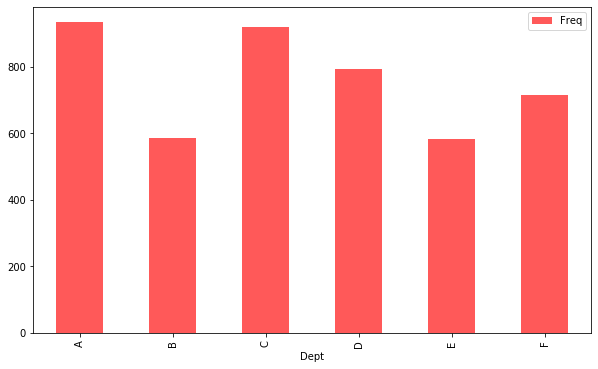

In [97]:
# do a histogram of applicants by Dept
df.groupby('Dept').sum().plot.bar(grid=False, color='#FF5959')

___

## References and Additional Resources
___

#### Install Pandas

https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html

```bash
# Pandas comes preinstalled with Anaconda. To install independently using conda
$ conda install pandas 
```


```bash
# Install using pip
$ pip install pandas 
```
___

#### Writing Data to csv

In [56]:
# get total number of applicants to Dept A
dept_a_applicants = df[df['Dept']=='A']['Freq'].sum()

In [57]:
# write to csv but exclude row names (takes a couple of seconds)
df.to_csv('dept_a_applicants.csv', index=False)

In [58]:
# sanity check
dept_a = pd.read_csv('dept_a_applicants.csv')
dept_a.head()

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353


___

#### Read and Write Excel Files

<br>

[Microsoft Excel](https://www.microsoft.com/en-us/microsoft-365/excel) is perhaps the most often used spreadshee software in industry. As fo 2007, Excel introduced the [XML](https://en.wikipedia.org/wiki/XML)-Based .xlsx file type. There are several [file formats](https://docs.microsoft.com/en-us/deployoffice/compat/office-file-format-reference) that Microsoft employs, most of which can be read by Pandas. The following focuses on ```.xlsx```  and ```.xls``` files. 

<br>

**Install Excel Read/Write Packages**

[xlwt](https://xlwt.readthedocs.io/en/latest/) is used to write to ```.xls``` files.<br>
[xlrd](https://xlrd.readthedocs.io/en/latest/) is used to read Excel files<br>
[openpyxl](https://openpyxl.readthedocs.io/en/stable/) is use to write to ```.xlsx``` files<br>
[XlsxWrite](https://xlsxwriter.readthedocs.io/) alternative to **openpyxl**

<br>

```bash
# Pandas comes preinstalled with Anaconda. To install independently using conda
$ conda install xlwt openpyxl xlsxwriter xlrd
```

```bash
# Install using pip
$ pip install xlwt openpyxl xlsxwriter xlrd
```

<br>

**Read/Write Excel Files**

In [59]:
# read excel file
edf = pd.read_excel('UCBAdmissions.xlsx')
# sanity check
type(edf)

TypeError: issubclass() arg 2 must be a class or tuple of classes

In [ ]:
# convert columns <--> rows
trans_edf = edf.T  
trans_edf

In [ ]:
# write excel file
trans_edf.to_excel('transpose_UCBAdmin_data.xlsx')

___

## Additional Content and Sources


> [Pandas User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)<br>
> [What is Pandas? by Python Programmer](https://youtu.be/dcqPhpY7tWk)<br> 
> [Pandas for Data Science by Real Python](https://realpython.com/learning-paths/pandas-data-science/)<br>
> [Python Pandas Tutorial (11 Parts) by Corey Schafer](https://youtu.be/ZyhVh-qRZPA)

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="DataX_icon_wide_logo.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>

___